In [2]:
import pandas as pd
df = pd.read_csv("stats/summary.csv")
df

,questionnaire,model,mode_mode,test_count,Extraversion_mean,Extraversion_std,Agreeableness_mean,Agreeableness_std,Conscientiousness_mean,Conscientiousness_std,Neuroticism_mean,Neuroticism_std,Openness_mean,Openness_std
0,BFI,crowd,crowd,6076,3.2,0.9,3.6,0.7,3.5,0.7,3.3,0.8,3.9,0.7
1,IPIP-NEO,crowd,crowd,619150,3.4,1.0,3.7,1.0,3.6,1.0,2.8,1.0,3.4,1.1
2,BFI,llama3_8b,direct,5,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.1,0.1
3,BFI,llama3_8b,train_0xxxx,5,3.8,0.2,4.7,0.1,3.8,0.3,2.5,0.1,5.0,0.0
4,BFI,llama3_8b,train_1xxxx,5,2.2,0.5,2.8,0.3,4.2,0.4,2.3,0.4,2.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,IPIP-NEO,llama3_70b,prompt_chat_x1xxx,5,3.3,0.1,3.1,0.0,2.2,0.1,2.6,0.1,3.1,0.1
142,IPIP-NEO,llama3_70b,prompt_chat_xxxx0,5,2.6,0.1,3.7,0.1,3.5,0.1,3.0,0.1,3.1,0.1
143,IPIP-NEO,llama3_70b,prompt_chat_xx0xx,5,4.0,0.1,3.6,0.0,3.4,0.1,2.2,0.1,3.3,0.0
144,IPIP-NEO,llama3_70b,prompt_chat_xxxx1,5,3.6,0.0,3.7,0.1,3.8,0.0,2.2,0.1,3.2,0.1


Summary plots

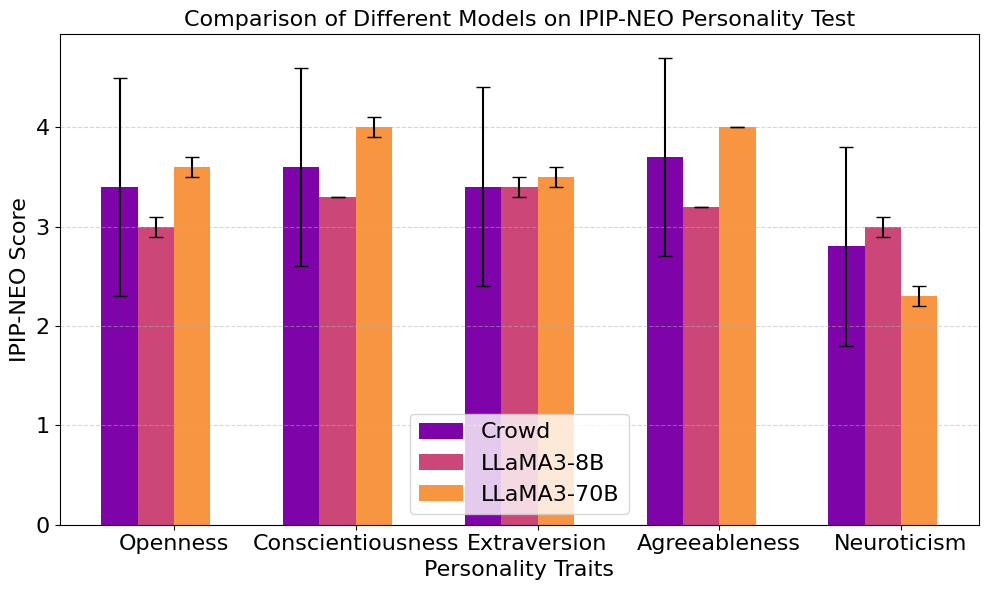

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data values for each method
questionnaire = "IPIP-NEO" # BFI, IPIP-NEO
cmap = plt.cm.plasma
colors = [cmap(i) for i in np.linspace(0, 1, 5)]

labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
crowd_labeled = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_mean" for i in labels]].values.tolist()[0]
llama3_8b_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_8b")][[f"{i}_mean" for i in labels]].values.tolist()[0]
llama3_70b_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_70b")][[f"{i}_mean" for i in labels]].values.tolist()[0]

crowd_labeled_std = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_std" for i in labels]].values.tolist()[0]
llama3_8b_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_8b")][[f"{i}_std" for i in labels]].values.tolist()[0]
llama3_70b_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == "llama3_70b")][[f"{i}_std" for i in labels]].values.tolist()[0]

# Grouping data for plotting
data = [crowd_labeled, llama3_8b_method, llama3_70b_method]
data_std = [crowd_labeled_std, llama3_8b_method_std, llama3_70b_method_std]
bar_labels = ['Crowd', 'LLaMA3-8B', 'LLaMA3-70B']
x = np.arange(len(labels))  # X-axis positions
bar_width = 0.2  # Width of each bar

# Plotting
plt.figure(figsize=(10, 6))
for i, (values, std) in enumerate(zip(data, data_std)):
    plt.bar(x + i * bar_width, values, yerr=std, capsize=5, width=bar_width, label=bar_labels[i], color=colors[(i + 1) % len(colors)])

# Customizing plot
plt.xlabel('Personality Traits', fontsize=16)
plt.ylabel(f'{questionnaire} Score', fontsize=16)
plt.xticks(x + bar_width * 1.5, labels, fontsize=16)  # Center ticks on groups
plt.yticks(fontsize=16)
plt.title(f'Comparison of Different Models on {questionnaire} Personality Test', fontsize=16)
plt.legend(fontsize=16, loc='lower center')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
# plt.show()
plt.savefig(f"stats/plots/questionnaire_summary/{questionnaire}_summary.pdf", bbox_inches='tight')


Tables

In [2]:
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for idx_label, label in enumerate(labels):
    df[f"{label}"] = df[f"{label}_mean"].astype(str) + r" $\pm$ " + df[f"{label}_std"].astype(str)
    df = df.drop(columns=[f"{label}_mean", f"{label}_std"])

In [8]:
# llama3 8b
data_dict = {
    "Direct": [],
    "Prompt V1": [],
    "Prompt V4": [],
    "SFT": [],
    "DPO": []
}

def find_non_x_index(string):
    # Iterate through the string to find the index where the character is not 'x'
    for i, char in enumerate(string):
        if char != 'x':
            return i
    # If no such index exists, you can raise an error or return a special value
    raise ValueError("No character other than 'x' found in the string.")

data = []
for questionnaire in ['BFI', 'IPIP-NEO']:
    for model, model_abbr in [['LLaMA3-8B', 'llama3_8b'], ['LLaMA3-70B', 'llama3_70b']]:
        for method, method_abbr in [['Direct', 'direct'], ['Prompt V1', 'prompt_v1_'], ["Prompt Chat", 'prompt_chat_'], ['SFT', 'train_'], ['DPO', 'train_dpo_']]:
            if method_abbr == "prompt_chat_" and model_abbr == "llama3_8b":
                continue
            row = [questionnaire, model, method]
            if method != "Direct":
                row_avg_high, row_std_high = 0, 0
                row_avg_low, row_std_low = 0, 0
                for mode in ["0xxxx", '1xxxx', 'x0xxx', 'x1xxx', 'xx0xx', 'xx1xx', 'xxx0x', 'xxx1x', 'xxxx0', 'xxxx1']:
                    label = labels[find_non_x_index(mode)]
                    val = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model_abbr)][[label]].values.tolist()[0][0]
                    row.append(val)
                    val_avg, val_std = val.split(r" $\pm$ ")
                    if "0" in mode:
                        row_avg_high += float(val_avg)
                        row_std_high += float(val_std)
                    elif "1" in mode:
                        row_avg_low += float(val_avg)
                        row_std_low += float(val_std)
                row.append(fr"{row_avg_high/5:.1f} $\pm$ {row_std_high/5:.1f}")
                row.append(fr"{row_avg_low/5:.1f} $\pm$ {row_std_low/5:.1f}")
            else:
                vals = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'direct')) & (df['model'] == model_abbr)][[labels[0], labels[0], labels[1], labels[1], labels[2], labels[2], labels[3], labels[3], labels[4], labels[4]]].values.tolist()[0]
                row.extend(vals)
                vals = [val.split(r" $\pm$ ") for val in vals]
                row_avg = float(vals[0][0]) + float(vals[2][0]) + float(vals[4][0]) + float(vals[6][0]) + float(vals[8][0])
                row_std = float(vals[0][1]) + float(vals[2][1]) + float(vals[4][1]) + float(vals[6][1]) + float(vals[8][1])
                row.append(fr"{row_avg/5:.1f} $\pm$ {row_std/5:.1f}")
            data.append(row)
df_1 = pd.DataFrame(data)
df_1.columns = ['Questionnaire', 'Model', 'Method'] + [f"{level} {label}" for label in labels for level in ['High', 'Low']] + ["High Average", "Low Average"]

In [9]:
df_1

,Questionnaire,Model,Method,High Openness,Low Openness,High Conscientiousness,Low Conscientiousness,High Extraversion,Low Extraversion,High Agreeableness,Low Agreeableness,High Neuroticism,Low Neuroticism,High Average,Low Average
0,BFI,LLaMA3-8B,Direct,3.1 $\pm$ 0.1,3.1 $\pm$ 0.1,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,3.0 $\pm$ 0.0,None
1,BFI,LLaMA3-8B,Prompt V1,5.0 $\pm$ 0.0,2.0 $\pm$ 0.3,4.9 $\pm$ 0.1,1.9 $\pm$ 0.1,4.8 $\pm$ 0.3,1.9 $\pm$ 0.1,4.9 $\pm$ 0.1,2.4 $\pm$ 0.4,4.1 $\pm$ 0.2,1.6 $\pm$ 0.0,4.7 $\pm$ 0.1,2.0 $\pm$ 0.2
2,BFI,LLaMA3-8B,SFT,5.0 $\pm$ 0.0,2.0 $\pm$ 0.2,5.0 $\pm$ 0.0,1.6 $\pm$ 0.1,4.7 $\pm$ 0.4,2.7 $\pm$ 0.5,5.0 $\pm$ 0.0,1.2 $\pm$ 0.1,4.1 $\pm$ 0.2,2.5 $\pm$ 0.0,4.8 $\pm$ 0.1,2.0 $\pm$ 0.2
3,BFI,LLaMA3-8B,DPO,5.0 $\pm$ 0.0,1.6 $\pm$ 0.2,5.0 $\pm$ 0.0,1.6 $\pm$ 0.1,4.8 $\pm$ 0.3,2.5 $\pm$ 0.0,4.8 $\pm$ 0.2,1.0 $\pm$ 0.0,3.5 $\pm$ 0.0,1.1 $\pm$ 0.1,4.6 $\pm$ 0.1,1.6 $\pm$ 0.1
4,BFI,LLaMA3-70B,Direct,4.4 $\pm$ 0.1,4.4 $\pm$ 0.1,4.4 $\pm$ 0.1,4.4 $\pm$ 0.1,3.3 $\pm$ 0.1,3.3 $\pm$ 0.1,4.6 $\pm$ 0.1,4.6 $\pm$ 0.1,2.1 $\pm$ 0.2,2.1 $\pm$ 0.2,3.8 $\pm$ 0.1,None
5,BFI,LLaMA3-70B,Prompt V1,5.0 $\pm$ 0.1,1.8 $\pm$ 0.0,5.0 $\pm$ 0.0,1.6 $\pm$ 0.0,5.0 $\pm$ 0.0,1.4 $\pm$ 0.1,4.9 $\pm$ 0.0,1.5 $\pm$ 0.1,5.0 $\pm$ 0.1,1.6 $\pm$ 0.0,5.0 $\pm$ 0.0,1.6 $\pm$ 0.0
6,BFI,LLaMA3-70B,Prompt Chat,4.0 $\pm$ 0.1,2.5 $\pm$ 0.1,4.0 $\pm$ 0.1,2.0 $\pm$ 0.1,4.5 $\pm$ 0.1,2.3 $\pm$ 0.1,4.4 $\pm$ 0.1,2.0 $\pm$ 0.0,3.6 $\pm$ 0.0,2.1 $\pm$ 0.1,4.1 $\pm$ 0.1,2.2 $\pm$ 0.1
7,BFI,LLaMA3-70B,SFT,5.0 $\pm$ 0.0,1.2 $\pm$ 0.1,5.0 $\pm$ 0.1,1.4 $\pm$ 0.1,5.0 $\pm$ 0.0,1.2 $\pm$ 0.1,5.0 $\pm$ 0.1,1.6 $\pm$ 0.2,5.0 $\pm$ 0.0,1.1 $\pm$ 0.2,5.0 $\pm$ 0.0,1.3 $\pm$ 0.1
8,BFI,LLaMA3-70B,DPO,5.0 $\pm$ 0.0,1.5 $\pm$ 0.1,5.0 $\pm$ 0.0,1.5 $\pm$ 0.1,5.0 $\pm$ 0.0,1.0 $\pm$ 0.1,5.0 $\pm$ 0.0,1.8 $\pm$ 0.2,5.0 $\pm$ 0.0,1.1 $\pm$ 0.0,5.0 $\pm$ 0.0,1.4 $\pm$ 0.1
9,IPIP-NEO,LLaMA3-8B,Direct,3.0 $\pm$ 0.1,3.0 $\pm$ 0.1,3.3 $\pm$ 0.0,3.3 $\pm$ 0.0,3.4 $\pm$ 0.1,3.4 $\pm$ 0.1,3.2 $\pm$ 0.0,3.2 $\pm$ 0.0,3.0 $\pm$ 0.1,3.0 $\pm$ 0.1,3.2 $\pm$ 0.1,None


In [10]:
df_1.columns

Index(['Questionnaire', 'Model', 'Method', 'High Openness', 'Low Openness',
       'High Conscientiousness', 'Low Conscientiousness', 'High Extraversion',
       'Low Extraversion', 'High Agreeableness', 'Low Agreeableness',
       'High Neuroticism', 'Low Neuroticism', 'High Average', 'Low Average'],
      dtype='object')

In [11]:
df_2 = df_1.loc[df_1['Questionnaire'] == 'BFI'].drop(columns=['Questionnaire'])
df_2 = df_2.set_index(['Model', 'Method'])
print(df_2.to_latex(multirow=True, index=True, header=False))

\begin{tabular}{llllllllllllll}
\toprule
Model & Method &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{LLaMA3-8B} & Direct & 3.1 $\pm$ 0.1 & 3.1 $\pm$ 0.1 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & 3.0 $\pm$ 0.0 & NaN \\
 & Prompt V1 & 5.0 $\pm$ 0.0 & 2.0 $\pm$ 0.3 & 4.9 $\pm$ 0.1 & 1.9 $\pm$ 0.1 & 4.8 $\pm$ 0.3 & 1.9 $\pm$ 0.1 & 4.9 $\pm$ 0.1 & 2.4 $\pm$ 0.4 & 4.1 $\pm$ 0.2 & 1.6 $\pm$ 0.0 & 4.7 $\pm$ 0.1 & 2.0 $\pm$ 0.2 \\
 & SFT & 5.0 $\pm$ 0.0 & 2.0 $\pm$ 0.2 & 5.0 $\pm$ 0.0 & 1.6 $\pm$ 0.1 & 4.7 $\pm$ 0.4 & 2.7 $\pm$ 0.5 & 5.0 $\pm$ 0.0 & 1.2 $\pm$ 0.1 & 4.1 $\pm$ 0.2 & 2.5 $\pm$ 0.0 & 4.8 $\pm$ 0.1 & 2.0 $\pm$ 0.2 \\
 & DPO & 5.0 $\pm$ 0.0 & 1.6 $\pm$ 0.2 & 5.0 $\pm$ 0.0 & 1.6 $\pm$ 0.1 & 4.8 $\pm$ 0.3 & 2.5 $\pm$ 0.0 & 4.8 $\pm$ 0.2 & 1.0 $\pm$ 0.0 & 3.5 $\pm$ 0.0 & 1.1 $\pm$ 0.1 & 4.6 $\pm$ 0.1 & 1.6 $\pm$ 0.1 \\
\cline{1-14}
\multirow[t]{5}{*}{LLaMA3-70B} & Direct & 4.4 $

In [12]:
df_2

High Openness   Low Openness High Conscientiousness  \
Model      Method                                                             
LLaMA3-8B  Direct       3.1 $\pm$ 0.1  3.1 $\pm$ 0.1          3.0 $\pm$ 0.0   
           Prompt V1    5.0 $\pm$ 0.0  2.0 $\pm$ 0.3          4.9 $\pm$ 0.1   
           SFT          5.0 $\pm$ 0.0  2.0 $\pm$ 0.2          5.0 $\pm$ 0.0   
           DPO          5.0 $\pm$ 0.0  1.6 $\pm$ 0.2          5.0 $\pm$ 0.0   
LLaMA3-70B Direct       4.4 $\pm$ 0.1  4.4 $\pm$ 0.1          4.4 $\pm$ 0.1   
           Prompt V1    5.0 $\pm$ 0.1  1.8 $\pm$ 0.0          5.0 $\pm$ 0.0   
           Prompt Chat  4.0 $\pm$ 0.1  2.5 $\pm$ 0.1          4.0 $\pm$ 0.1   
           SFT          5.0 $\pm$ 0.0  1.2 $\pm$ 0.1          5.0 $\pm$ 0.1   
           DPO          5.0 $\pm$ 0.0  1.5 $\pm$ 0.1          5.0 $\pm$ 0.0   

                       Low Conscientiousness High Extraversion  \
Model      Method                                                
LLaMA3-8B  Direct              3.0 $\pm$ 0.0     3.0 $\pm$ 0.0   
           Prompt V1           1.9 $\pm$ 0.1     4.8 $\pm$ 0.3   
           SFT                 1.6 $\pm$ 0.1     4.7 $\pm$ 0.4   
           DPO                 1.6 $\pm$ 0.1     4.8 $\pm$ 0.3   
LLaMA3-70B Direct              4.4 $\pm$ 0.1     3.3 $\pm$ 0.1   
           Prompt V1           1.6 $\pm$ 0.0     5.0 $\pm$ 0.0   
           Prompt Chat         2.0 $\pm$ 0.1     4.5 $\pm$ 0.1   
           SFT                 1.4 $\pm$ 0.1     5.0 $\pm$ 0.0   
           DPO                 1.5 $\pm$ 0.1     5.0 $\pm$ 0.0   

                       Low Extraversion High Agreeableness Low Agreeableness  \
Model      Method                                                              
LLaMA3-8B  Direct         3.0 $\pm$ 0.0      3.0 $\pm$ 0.0     3.0 $\pm$ 0.0   
           Prompt V1      1.9 $\pm$ 0.1      4.9 $\pm$ 0.1     2.4 $\pm$ 0.4   
           SFT            2.7 $\pm$ 0.5      5.0 $\pm$ 0.0     1.2 $\pm$ 0.1   
           DPO            2.5 $\pm$ 0.0      4.8 $\pm$ 0.2     1.0 $\pm$ 0.0   
LLaMA3-70B Direct         3.3 $\pm$ 0.1      4.6 $\pm$ 0.1     4.6 $\pm$ 0.1   
           Prompt V1      1.4 $\pm$ 0.1      4.9 $\pm$ 0.0     1.5 $\pm$ 0.1   
           Prompt Chat    2.3 $\pm$ 0.1      4.4 $\pm$ 0.1     2.0 $\pm$ 0.0   
           SFT            1.2 $\pm$ 0.1      5.0 $\pm$ 0.1     1.6 $\pm$ 0.2   
           DPO            1.0 $\pm$ 0.1      5.0 $\pm$ 0.0     1.8 $\pm$ 0.2   

                       High Neuroticism Low Neuroticism   High Average  \
Model      Method                                                        
LLaMA3-8B  Direct         3.0 $\pm$ 0.0   3.0 $\pm$ 0.0  3.0 $\pm$ 0.0   
           Prompt V1      4.1 $\pm$ 0.2   1.6 $\pm$ 0.0  4.7 $\pm$ 0.1   
           SFT            4.1 $\pm$ 0.2   2.5 $\pm$ 0.0  4.8 $\pm$ 0.1   
           DPO            3.5 $\pm$ 0.0   1.1 $\pm$ 0.1  4.6 $\pm$ 0.1   
LLaMA3-70B Direct         2.1 $\pm$ 0.2   2.1 $\pm$ 0.2  3.8 $\pm$ 0.1   
           Prompt V1      5.0 $\pm$ 0.1   1.6 $\pm$ 0.0  5.0 $\pm$ 0.0   
           Prompt Chat    3.6 $\pm$ 0.0   2.1 $\pm$ 0.1  4.1 $\pm$ 0.1   
           SFT            5.0 $\pm$ 0.0   1.1 $\pm$ 0.2  5.0 $\pm$ 0.0   
           DPO            5.0 $\pm$ 0.0   1.1 $\pm$ 0.0  5.0 $\pm$ 0.0   

                          Low Average  
Model      Method                      
LLaMA3-8B  Direct                None  
           Prompt V1    2.0 $\pm$ 0.2  
           SFT          2.0 $\pm$ 0.2  
           DPO          1.6 $\pm$ 0.1  
LLaMA3-70B Direct                None  
           Prompt V1    1.6 $\pm$ 0.0  
           Prompt Chat  2.2 $\pm$ 0.1  
           SFT          1.3 $\pm$ 0.1  
           DPO          1.4 $\pm$ 0.1

In [13]:
df_3 = df_1.loc[df_1['Questionnaire'] == 'IPIP-NEO'].drop(columns=['Questionnaire'])
df_3 = df_3.set_index(['Model', 'Method'])
print(df_3.to_latex(multirow=True, index=True, header=False))

\begin{tabular}{llllllllllllll}
\toprule
Model & Method &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{LLaMA3-8B} & Direct & 3.0 $\pm$ 0.1 & 3.0 $\pm$ 0.1 & 3.3 $\pm$ 0.0 & 3.3 $\pm$ 0.0 & 3.4 $\pm$ 0.1 & 3.4 $\pm$ 0.1 & 3.2 $\pm$ 0.0 & 3.2 $\pm$ 0.0 & 3.0 $\pm$ 0.1 & 3.0 $\pm$ 0.1 & 3.2 $\pm$ 0.1 & NaN \\
 & Prompt V1 & 4.4 $\pm$ 0.1 & 1.5 $\pm$ 0.1 & 4.5 $\pm$ 0.1 & 2.3 $\pm$ 0.1 & 5.0 $\pm$ 0.0 & 1.9 $\pm$ 0.0 & 4.6 $\pm$ 0.0 & 2.3 $\pm$ 0.1 & 4.2 $\pm$ 0.1 & 2.6 $\pm$ 0.1 & 4.5 $\pm$ 0.1 & 2.1 $\pm$ 0.1 \\
 & SFT & 4.3 $\pm$ 0.1 & 1.5 $\pm$ 0.1 & 4.5 $\pm$ 0.2 & 2.7 $\pm$ 0.1 & 5.0 $\pm$ 0.0 & 2.2 $\pm$ 0.1 & 4.0 $\pm$ 0.2 & 1.8 $\pm$ 0.2 & 4.3 $\pm$ 0.1 & 2.0 $\pm$ 0.1 & 4.4 $\pm$ 0.1 & 2.0 $\pm$ 0.1 \\
 & DPO & 5.0 $\pm$ 0.0 & 1.9 $\pm$ 0.1 & 5.0 $\pm$ 0.0 & 2.9 $\pm$ 0.1 & 5.0 $\pm$ 0.0 & 1.6 $\pm$ 0.1 & 4.5 $\pm$ 0.1 & 1.2 $\pm$ 0.0 & 3.8 $\pm$ 0.1 & 3.7 $\pm$ 0.1 & 4.7 $\pm$ 0.0 & 2.3 $\pm$ 0.1 \\
\cline{1-14}
\multirow[t]{5}{*}{LLaMA3-70B} & Direct & 3.6 $

In [14]:
df_3

High Openness   Low Openness High Conscientiousness  \
Model      Method                                                             
LLaMA3-8B  Direct       3.0 $\pm$ 0.1  3.0 $\pm$ 0.1          3.3 $\pm$ 0.0   
           Prompt V1    4.4 $\pm$ 0.1  1.5 $\pm$ 0.1          4.5 $\pm$ 0.1   
           SFT          4.3 $\pm$ 0.1  1.5 $\pm$ 0.1          4.5 $\pm$ 0.2   
           DPO          5.0 $\pm$ 0.0  1.9 $\pm$ 0.1          5.0 $\pm$ 0.0   
LLaMA3-70B Direct       3.6 $\pm$ 0.1  3.6 $\pm$ 0.1          4.0 $\pm$ 0.1   
           Prompt V1    4.6 $\pm$ 0.0  1.3 $\pm$ 0.0          5.0 $\pm$ 0.0   
           Prompt Chat  3.5 $\pm$ 0.0  2.5 $\pm$ 0.1          3.8 $\pm$ 0.0   
           SFT          4.9 $\pm$ 0.1  1.1 $\pm$ 0.0          5.0 $\pm$ 0.0   
           DPO          4.8 $\pm$ 0.0  1.4 $\pm$ 0.1          5.0 $\pm$ 0.0   

                       Low Conscientiousness High Extraversion  \
Model      Method                                                
LLaMA3-8B  Direct              3.3 $\pm$ 0.0     3.4 $\pm$ 0.1   
           Prompt V1           2.3 $\pm$ 0.1     5.0 $\pm$ 0.0   
           SFT                 2.7 $\pm$ 0.1     5.0 $\pm$ 0.0   
           DPO                 2.9 $\pm$ 0.1     5.0 $\pm$ 0.0   
LLaMA3-70B Direct              4.0 $\pm$ 0.1     3.5 $\pm$ 0.1   
           Prompt V1           1.4 $\pm$ 0.0     5.0 $\pm$ 0.0   
           Prompt Chat         2.2 $\pm$ 0.1     4.0 $\pm$ 0.1   
           SFT                 1.3 $\pm$ 0.1     5.0 $\pm$ 0.0   
           DPO                 1.6 $\pm$ 0.1     5.0 $\pm$ 0.0   

                       Low Extraversion High Agreeableness Low Agreeableness  \
Model      Method                                                              
LLaMA3-8B  Direct         3.4 $\pm$ 0.1      3.2 $\pm$ 0.0     3.2 $\pm$ 0.0   
           Prompt V1      1.9 $\pm$ 0.0      4.6 $\pm$ 0.0     2.3 $\pm$ 0.1   
           SFT            2.2 $\pm$ 0.1      4.0 $\pm$ 0.2     1.8 $\pm$ 0.2   
           DPO            1.6 $\pm$ 0.1      4.5 $\pm$ 0.1     1.2 $\pm$ 0.0   
LLaMA3-70B Direct         3.5 $\pm$ 0.1      4.0 $\pm$ 0.0     4.0 $\pm$ 0.0   
           Prompt V1      1.6 $\pm$ 0.0      4.8 $\pm$ 0.0     1.1 $\pm$ 0.1   
           Prompt Chat    2.5 $\pm$ 0.0      4.3 $\pm$ 0.0     2.1 $\pm$ 0.1   
           SFT            1.3 $\pm$ 0.0      4.9 $\pm$ 0.0     1.0 $\pm$ 0.0   
           DPO            1.1 $\pm$ 0.1      4.9 $\pm$ 0.0     1.0 $\pm$ 0.0   

                       High Neuroticism Low Neuroticism   High Average  \
Model      Method                                                        
LLaMA3-8B  Direct         3.0 $\pm$ 0.1   3.0 $\pm$ 0.1  3.2 $\pm$ 0.1   
           Prompt V1      4.2 $\pm$ 0.1   2.6 $\pm$ 0.1  4.5 $\pm$ 0.1   
           SFT            4.3 $\pm$ 0.1   2.0 $\pm$ 0.1  4.4 $\pm$ 0.1   
           DPO            3.8 $\pm$ 0.1   3.7 $\pm$ 0.1  4.7 $\pm$ 0.0   
LLaMA3-70B Direct         2.3 $\pm$ 0.1   2.3 $\pm$ 0.1  3.5 $\pm$ 0.1   
           Prompt V1      4.9 $\pm$ 0.0   1.7 $\pm$ 0.1  4.9 $\pm$ 0.0   
           Prompt Chat    3.0 $\pm$ 0.1   2.2 $\pm$ 0.1  3.7 $\pm$ 0.0   
           SFT            4.9 $\pm$ 0.0   1.2 $\pm$ 0.1  4.9 $\pm$ 0.0   
           DPO            5.0 $\pm$ 0.0   1.1 $\pm$ 0.0  4.9 $\pm$ 0.0   

                          Low Average  
Model      Method                      
LLaMA3-8B  Direct                None  
           Prompt V1    2.1 $\pm$ 0.1  
           SFT          2.0 $\pm$ 0.1  
           DPO          2.3 $\pm$ 0.1  
LLaMA3-70B Direct                None  
           Prompt V1    1.4 $\pm$ 0.0  
           Prompt Chat  2.3 $\pm$ 0.1  
           SFT          1.2 $\pm$ 0.0  
           DPO          1.2 $\pm$ 0.1

All figures

/tmp/ipykernel_2269617/3831571860.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


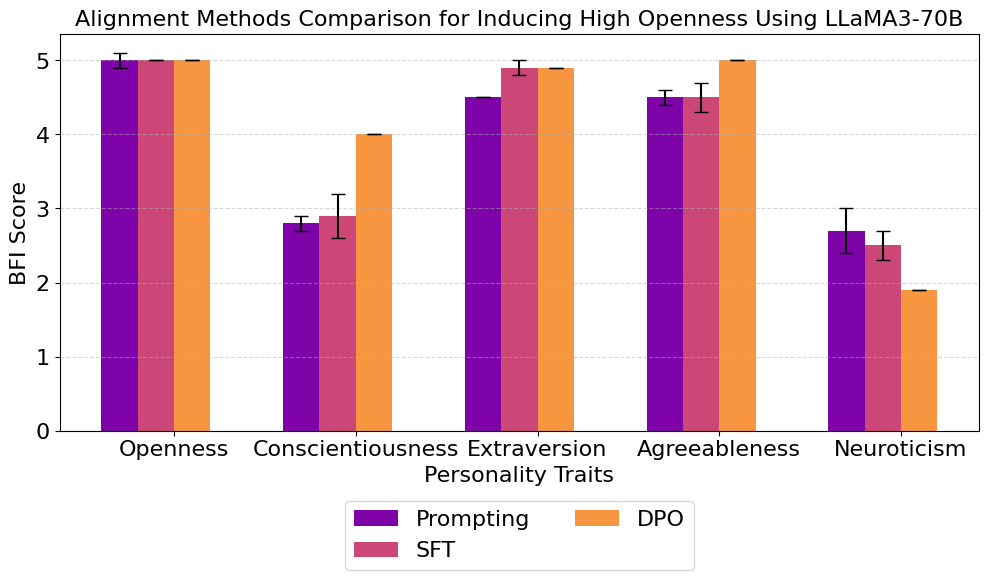

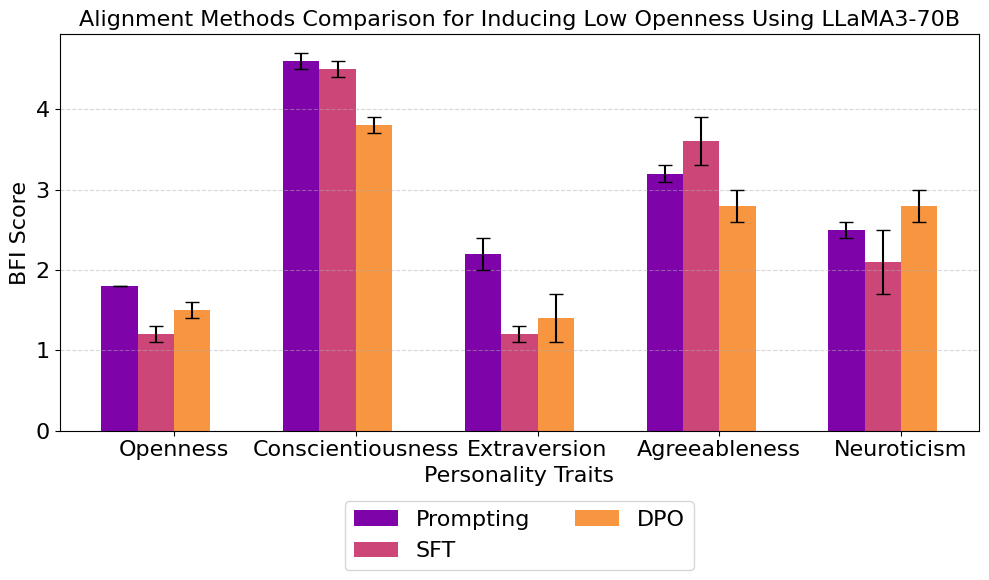

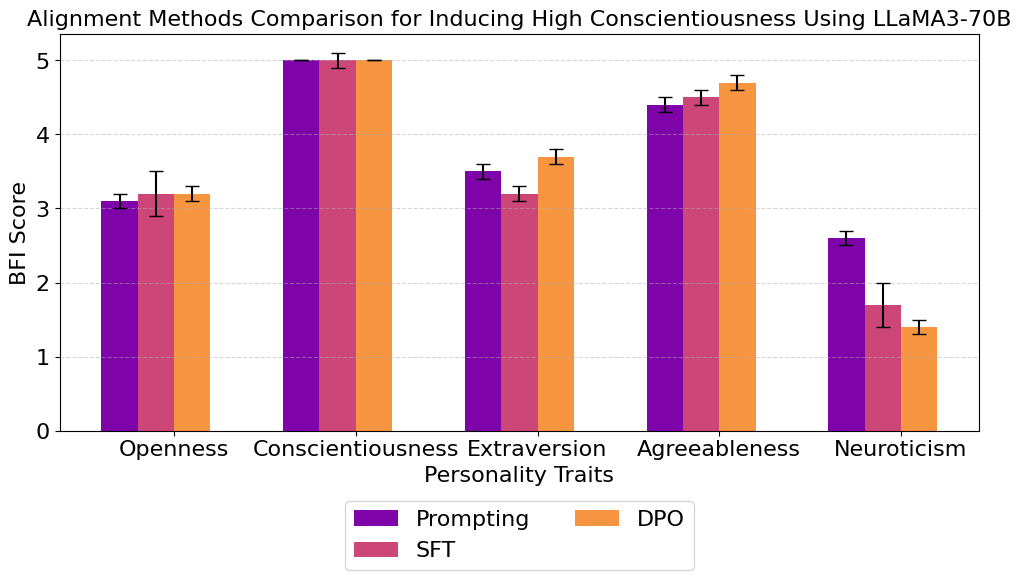

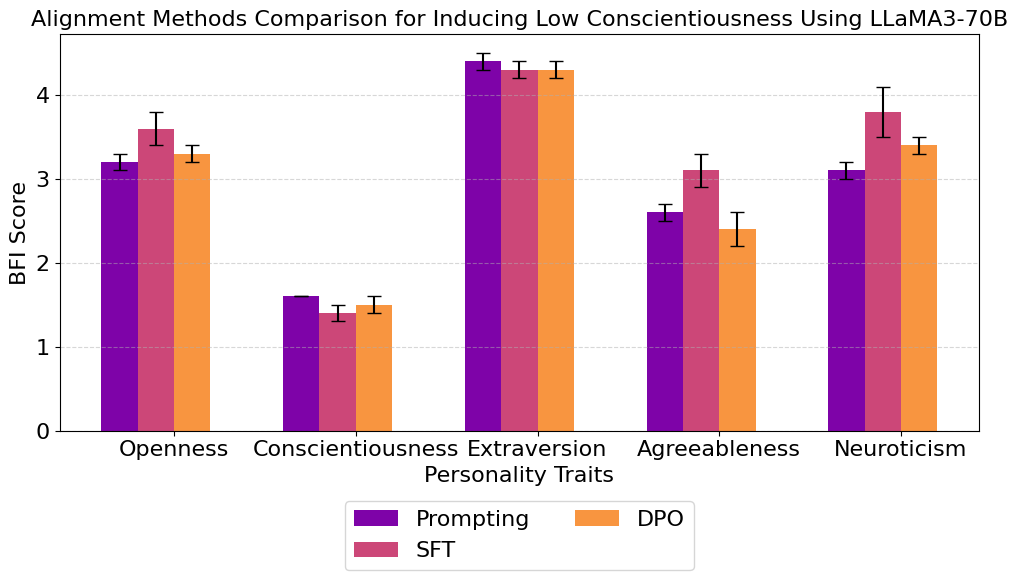

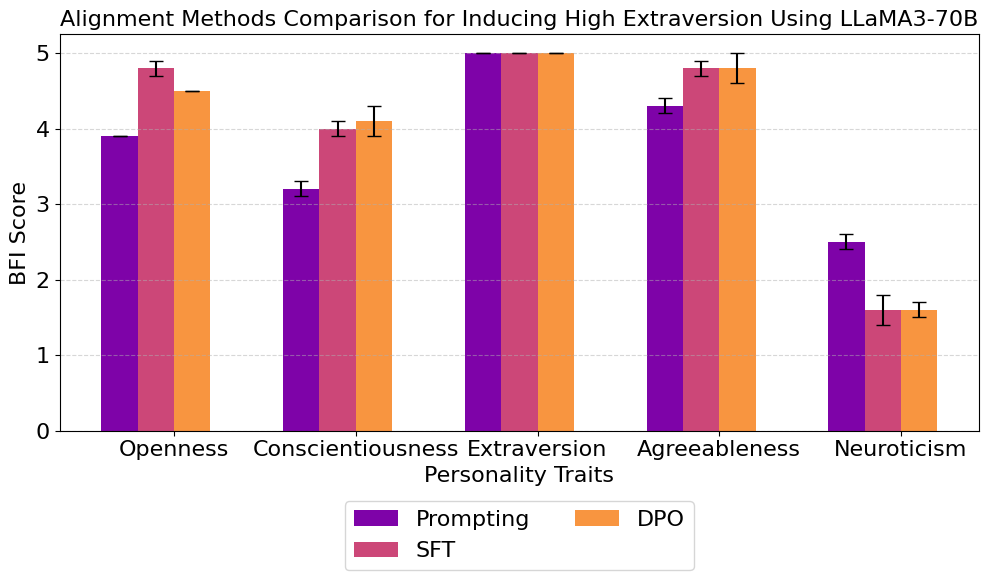

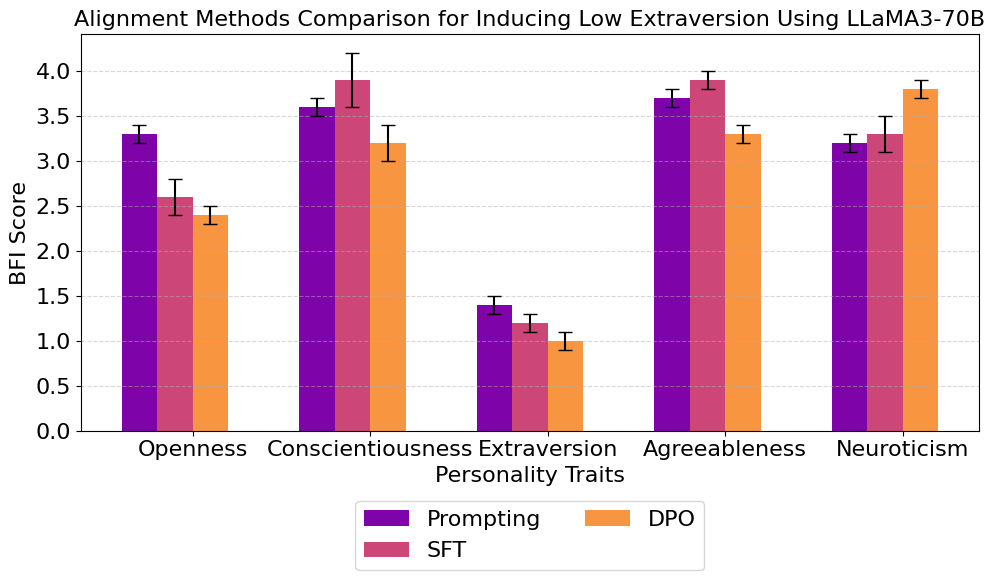

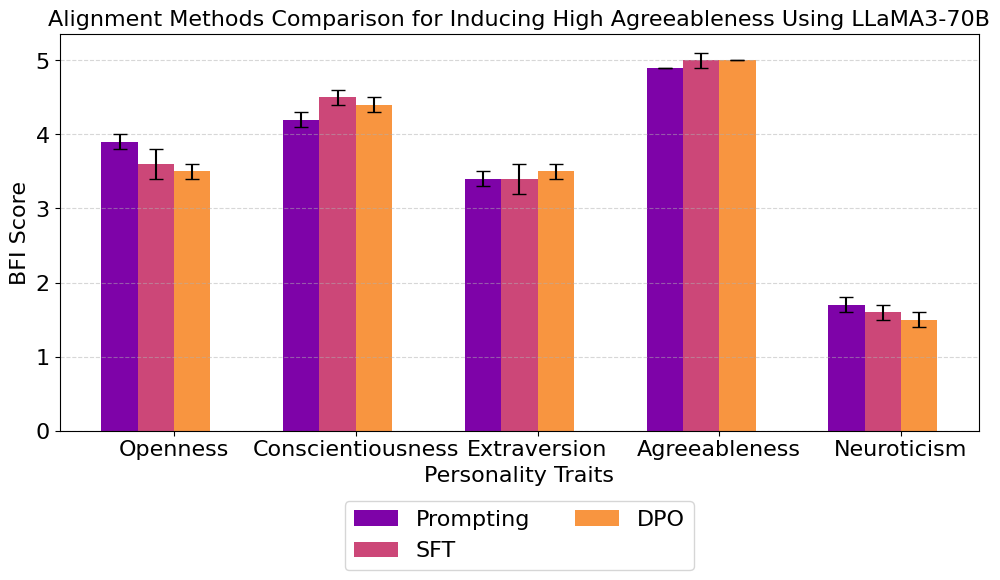

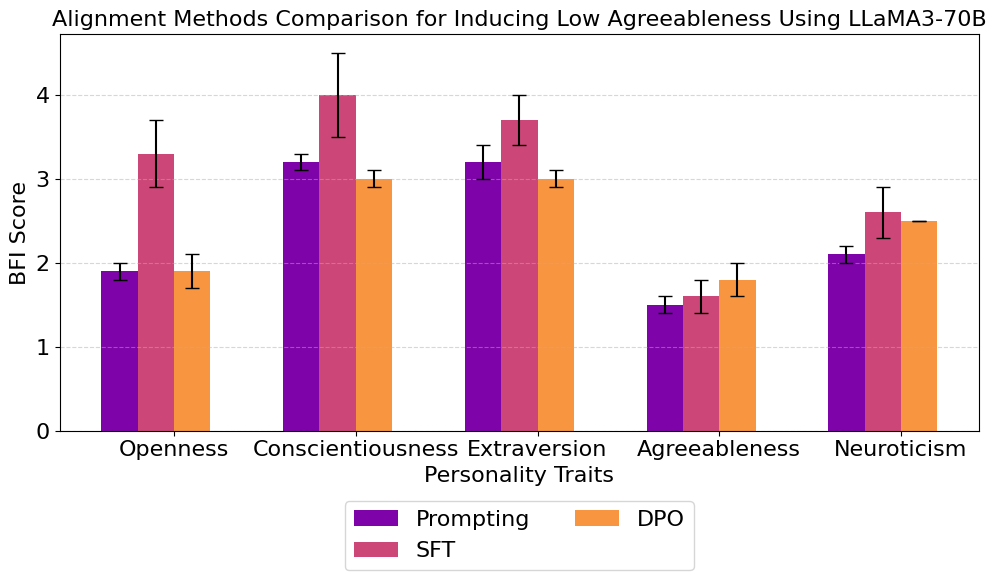

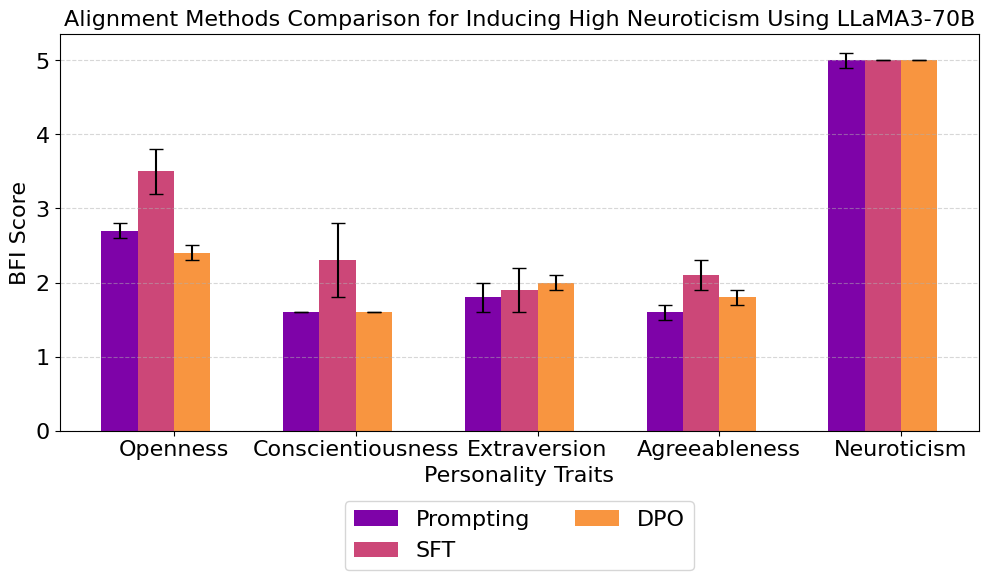

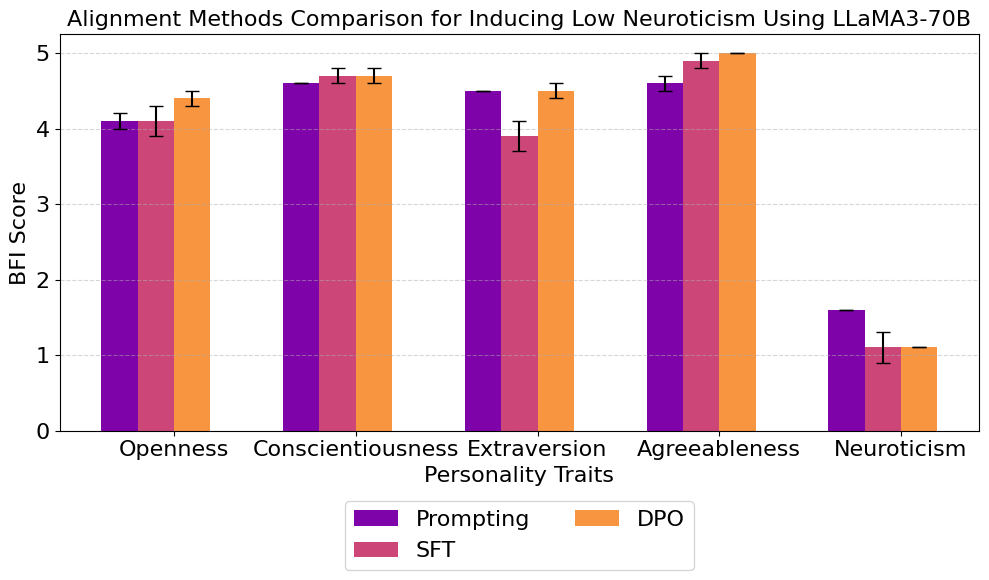

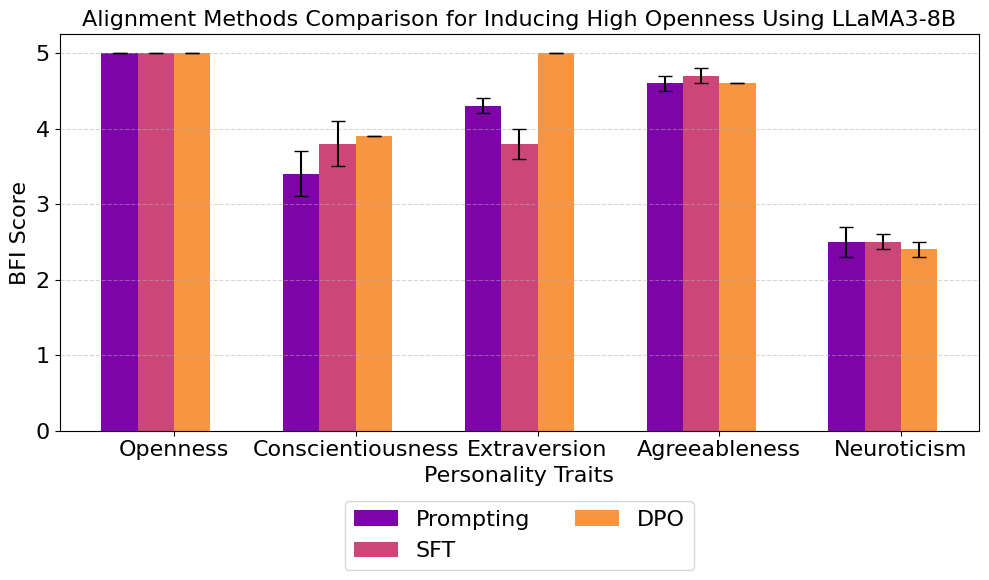

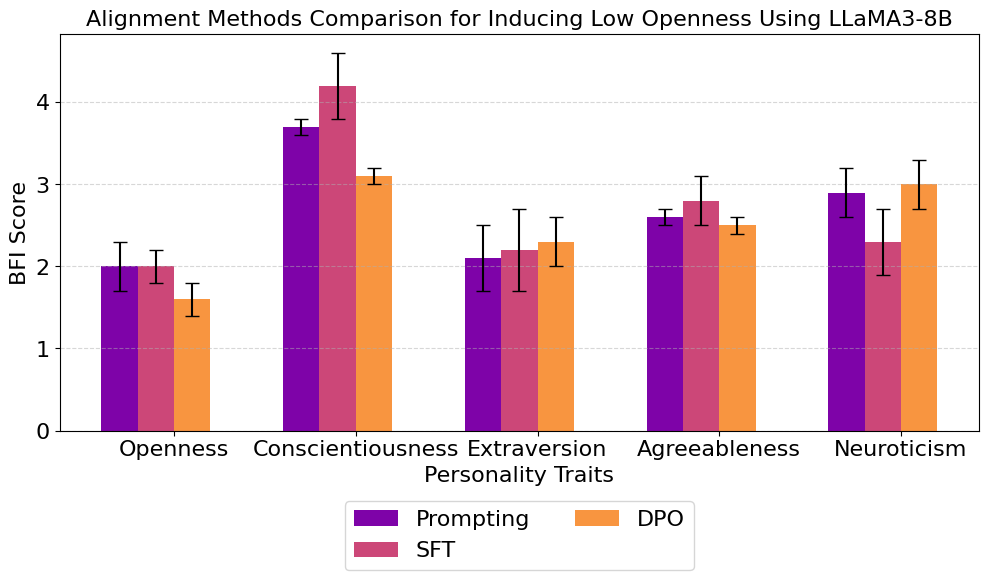

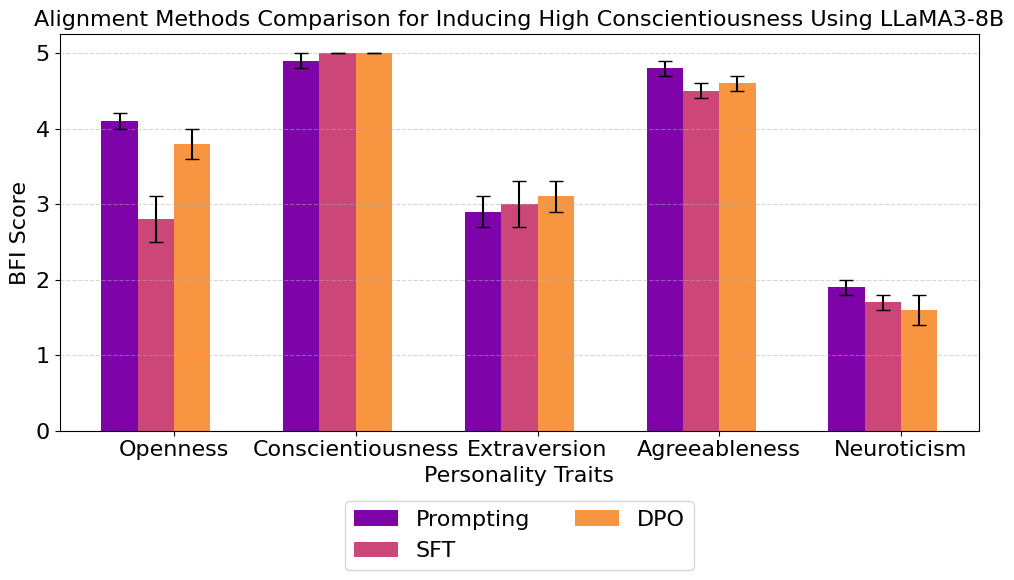

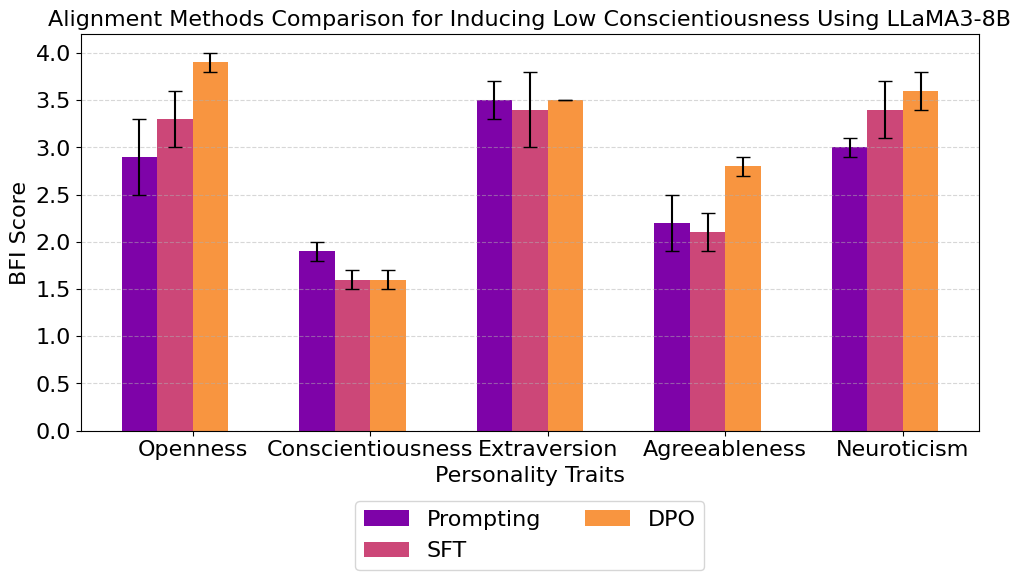

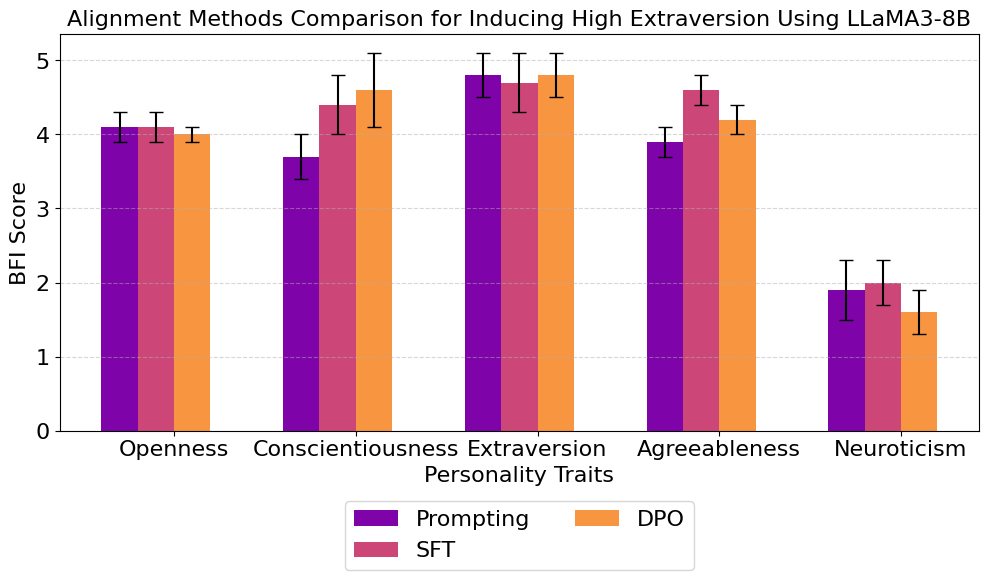

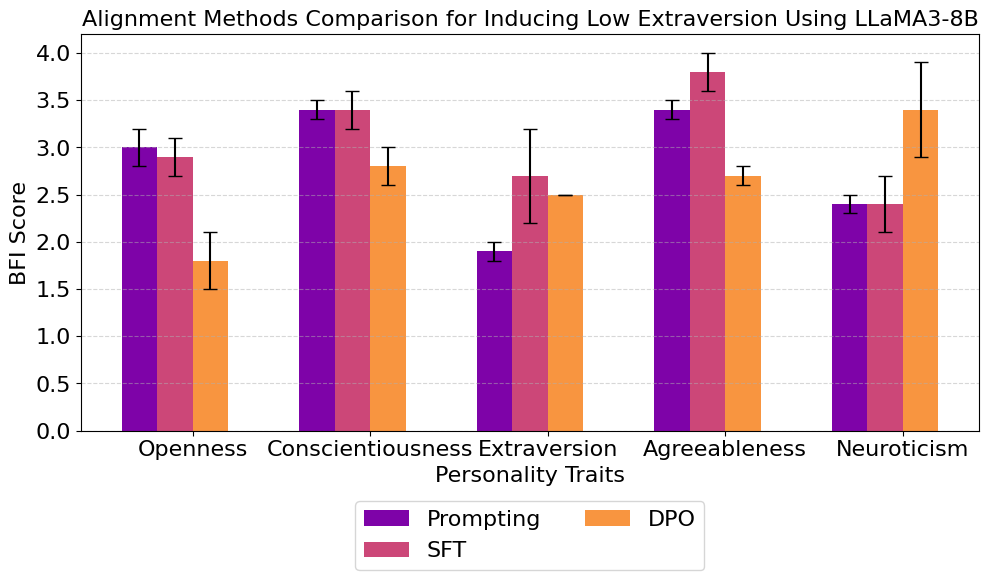

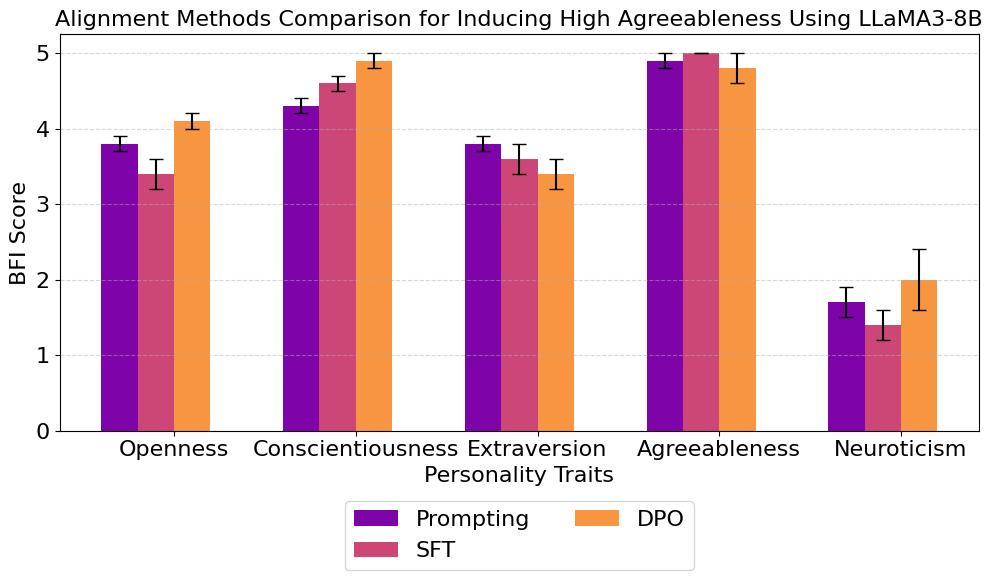

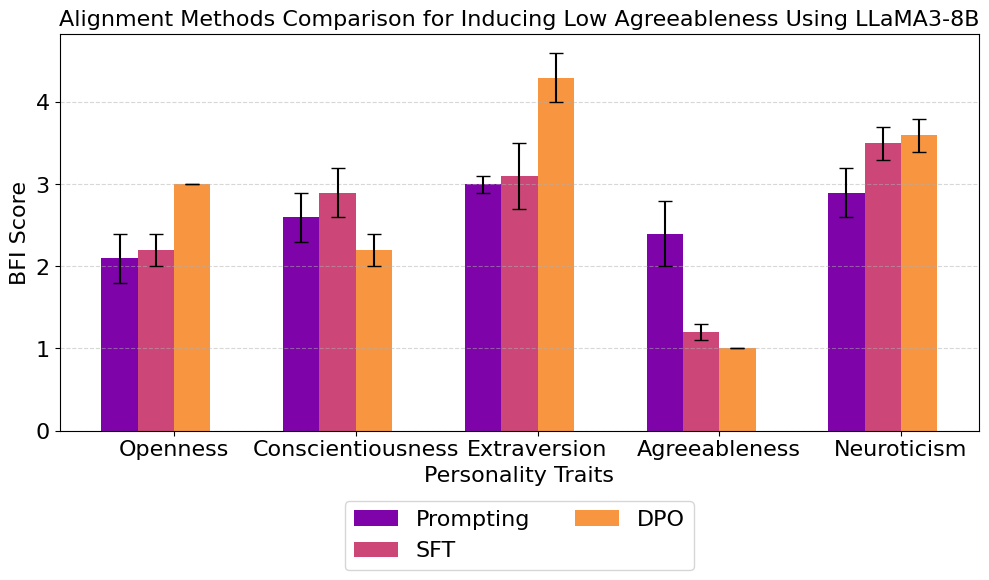

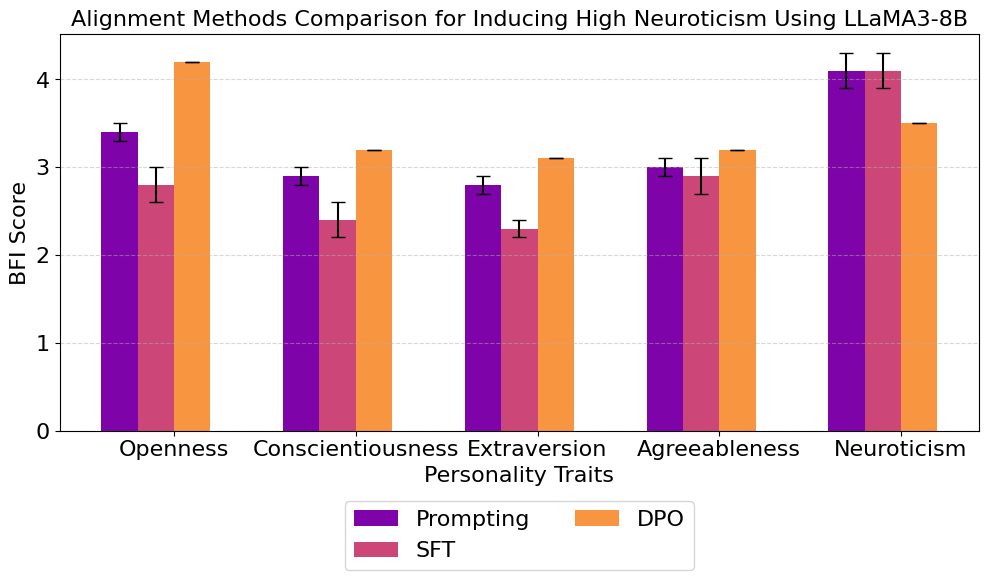

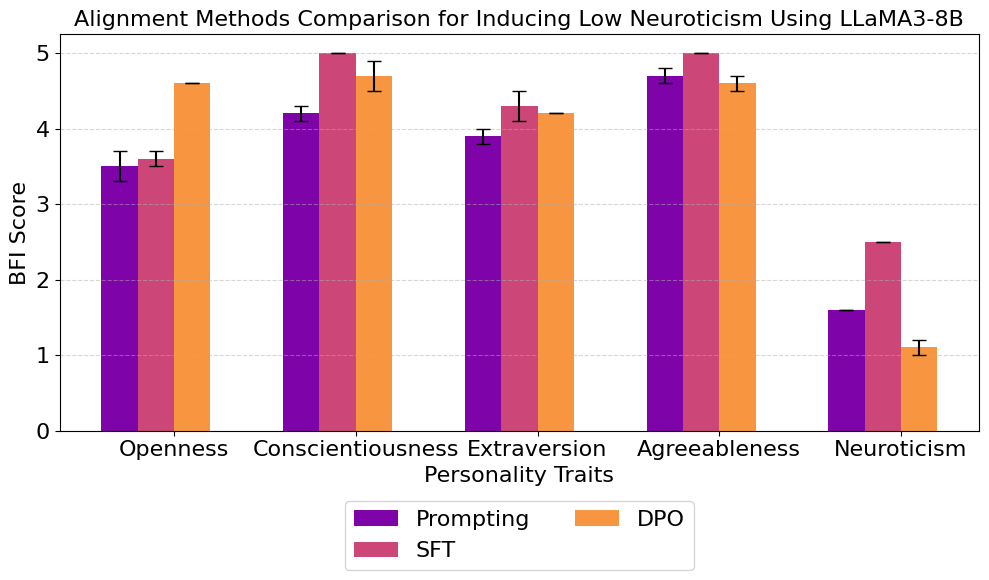

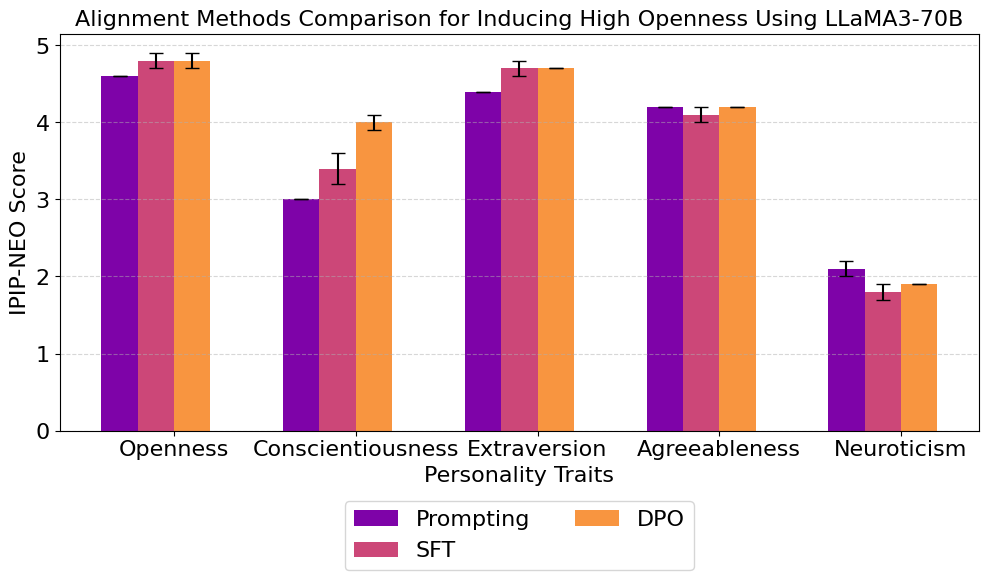

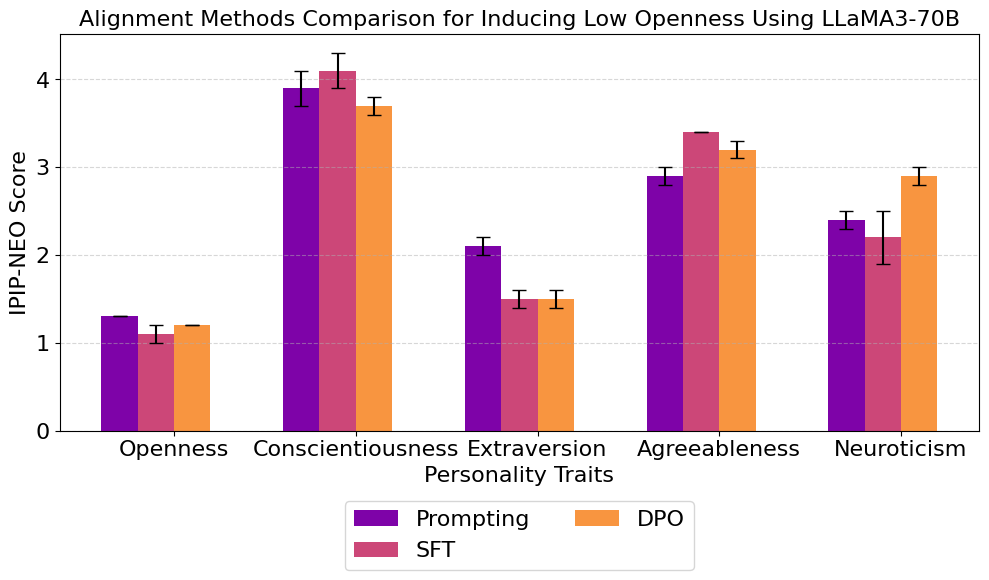

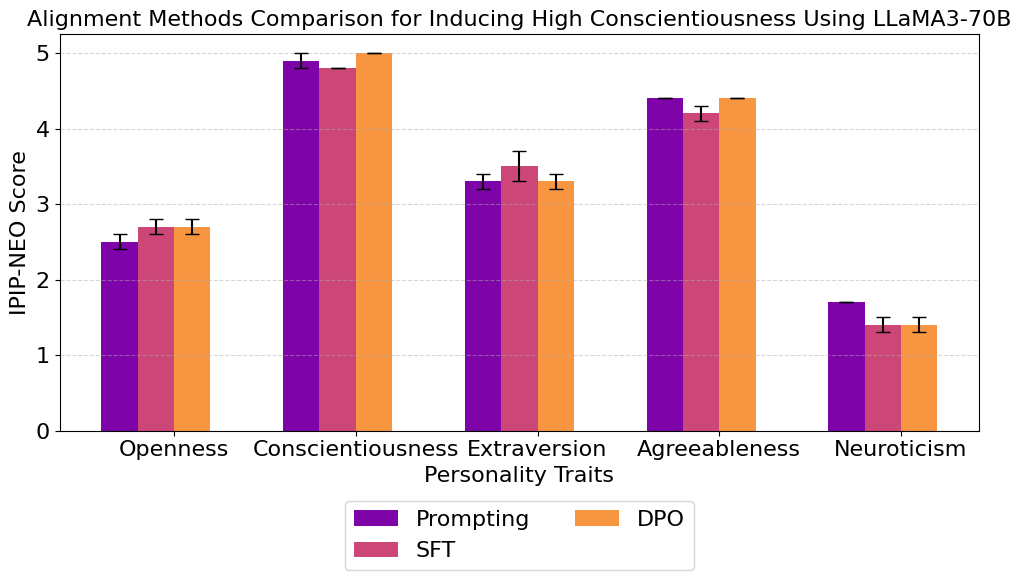

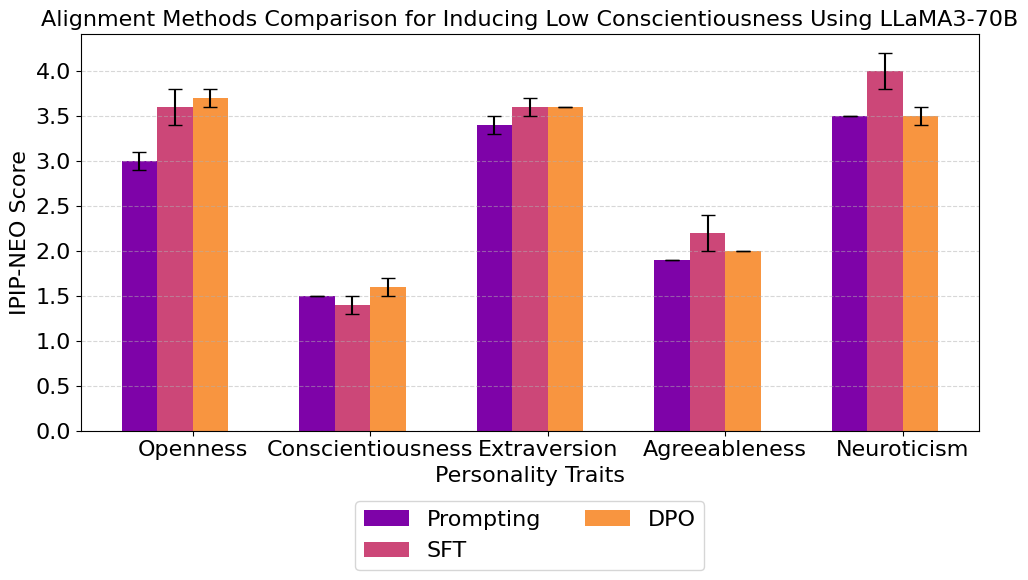

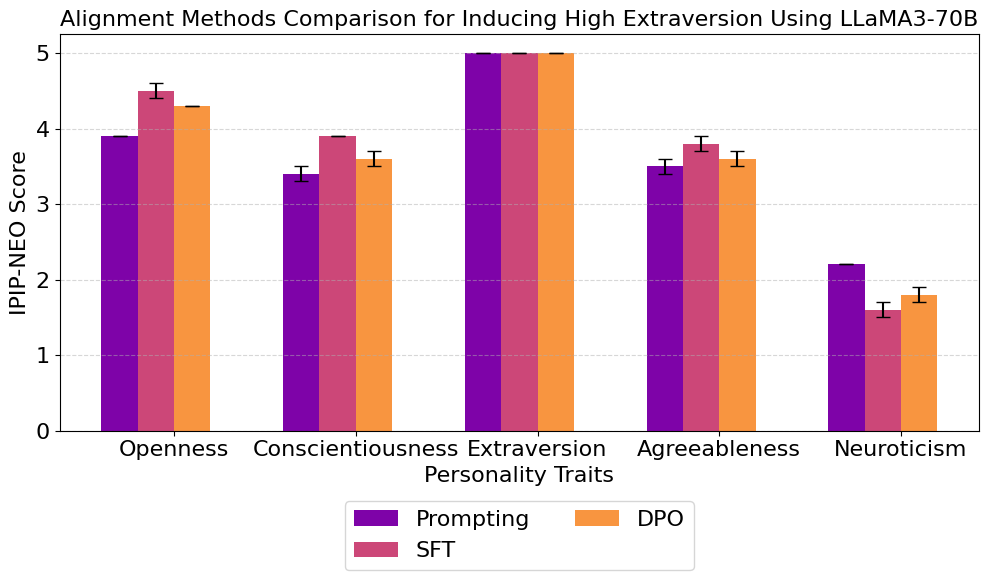

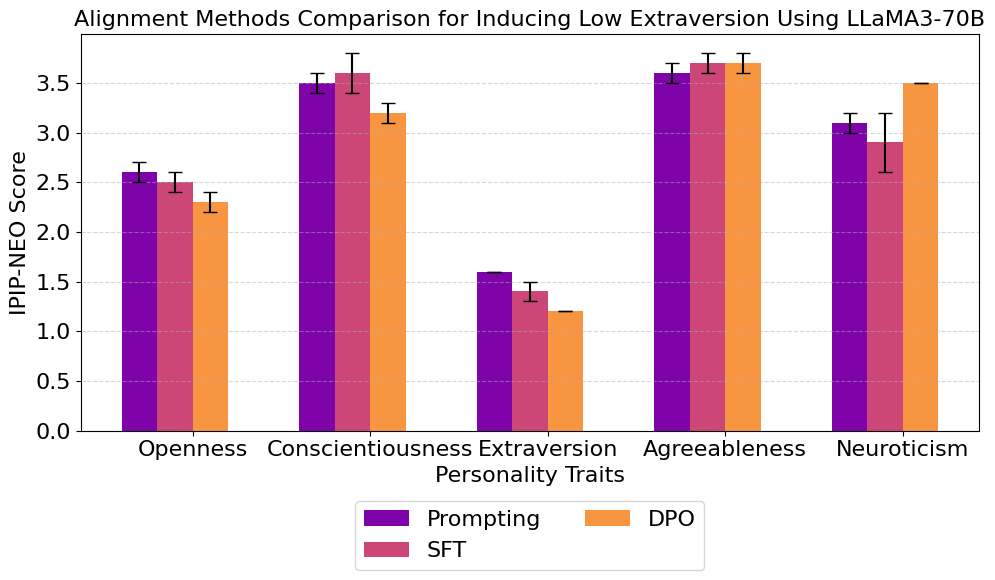

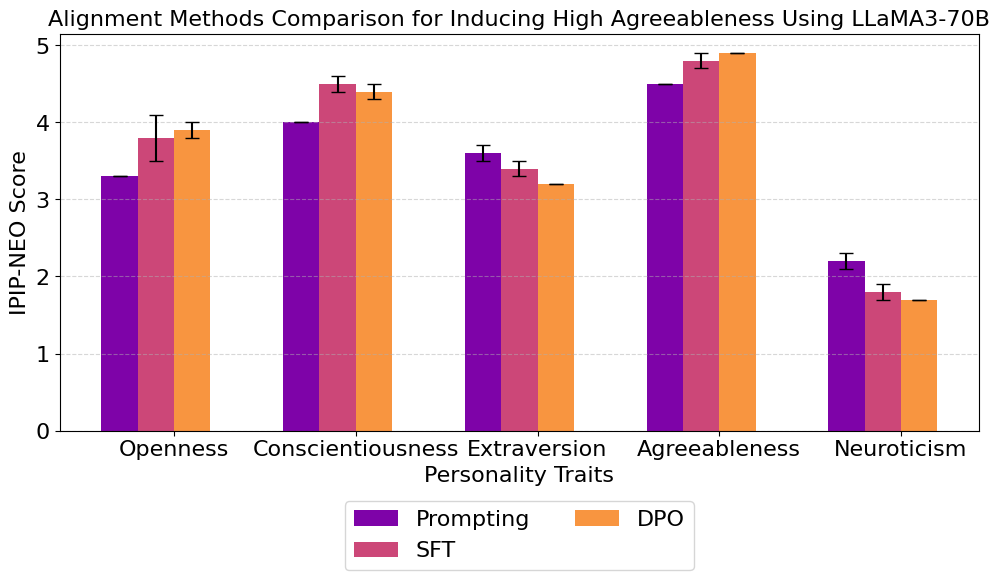

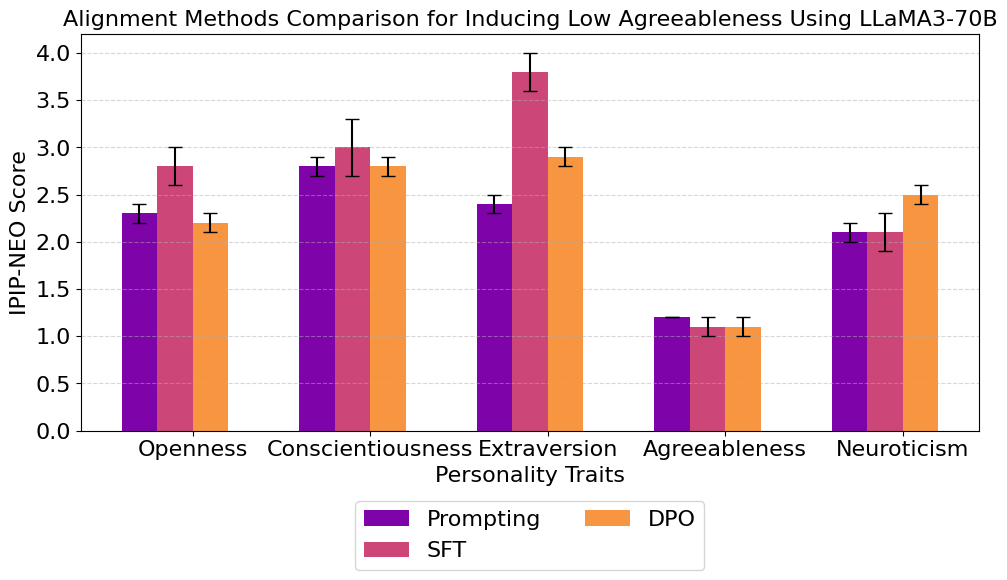

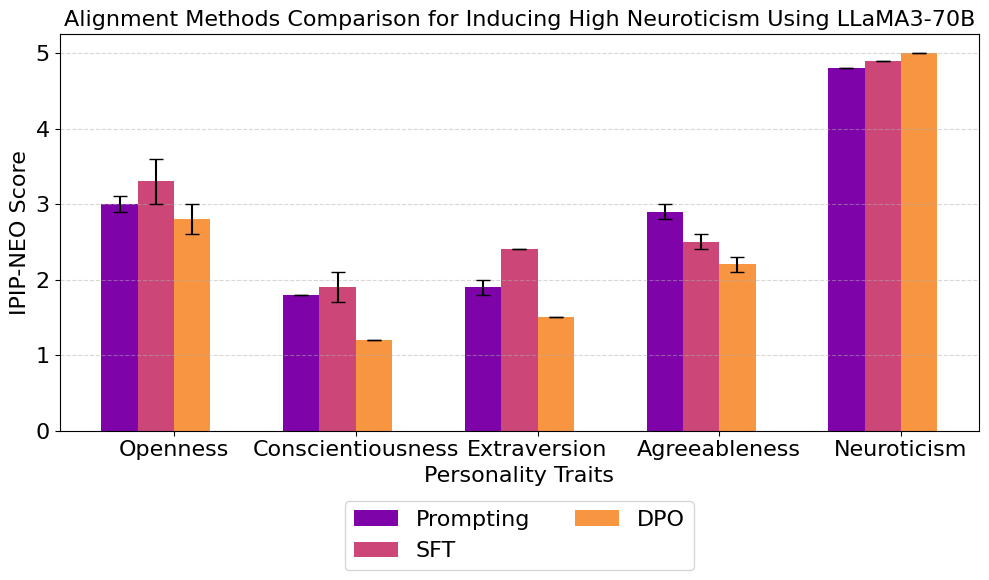

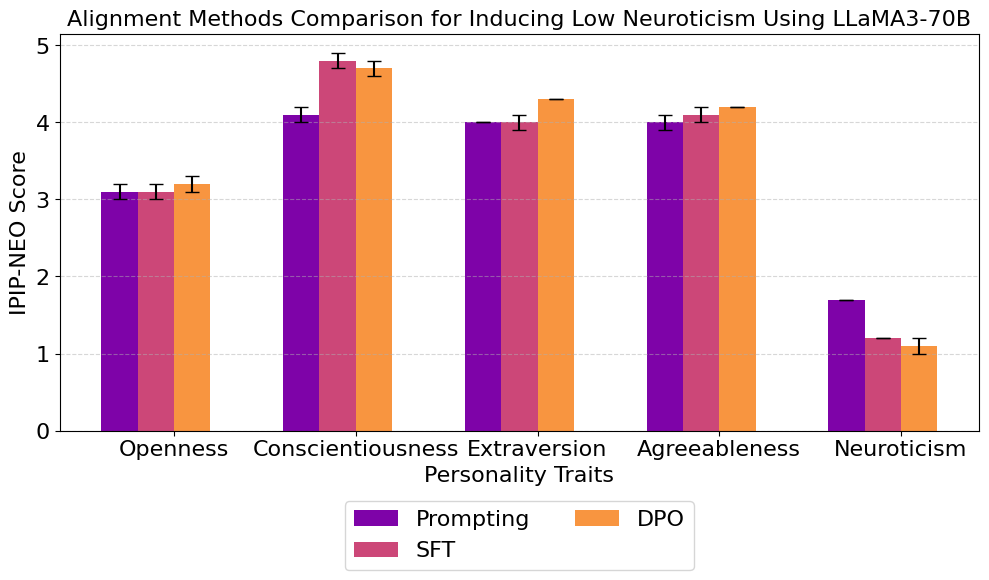

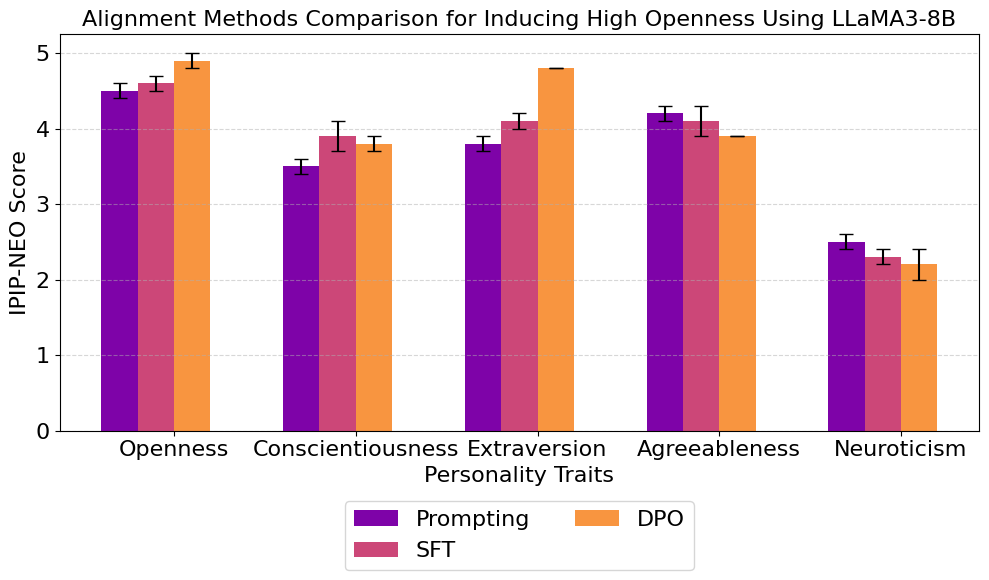

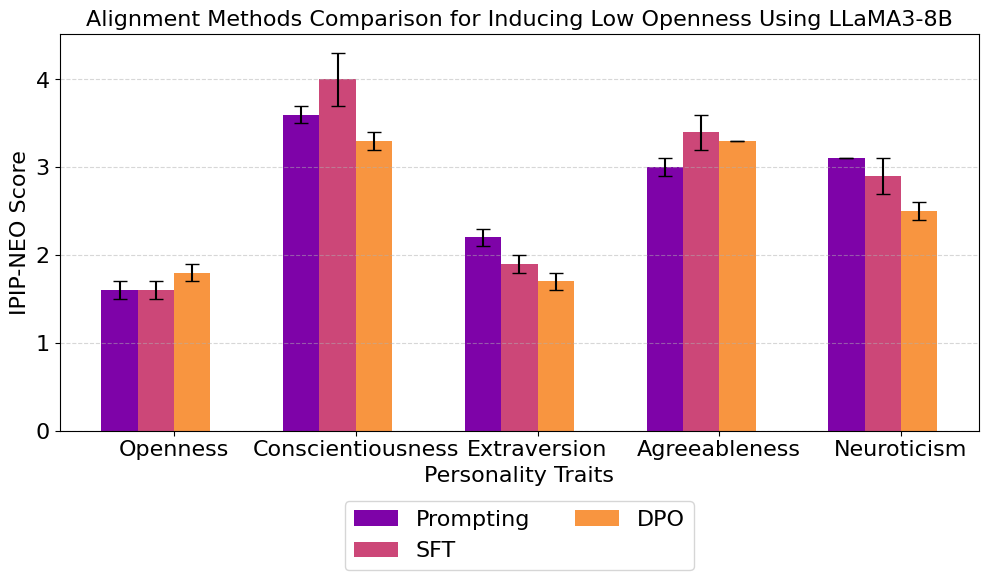

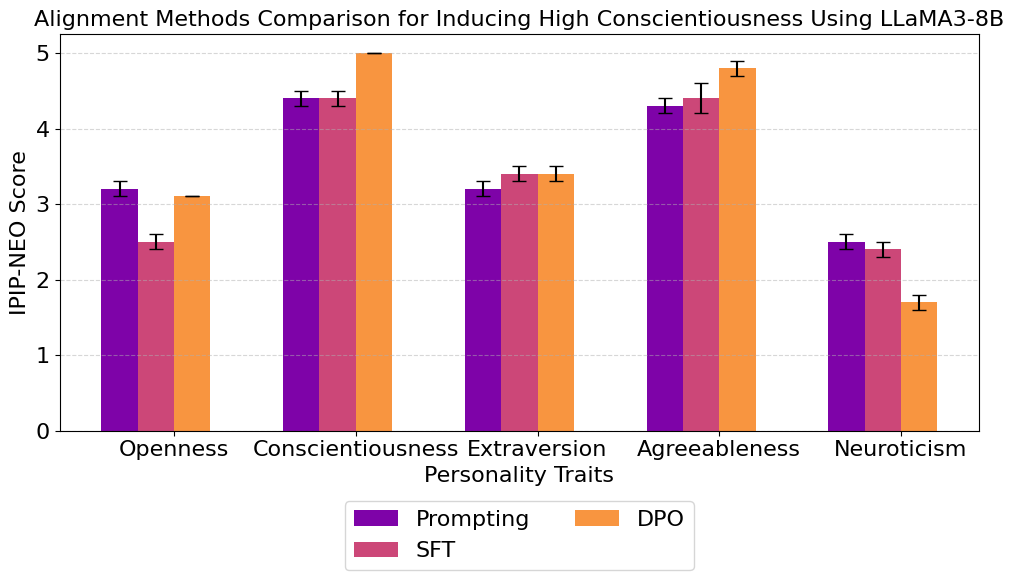

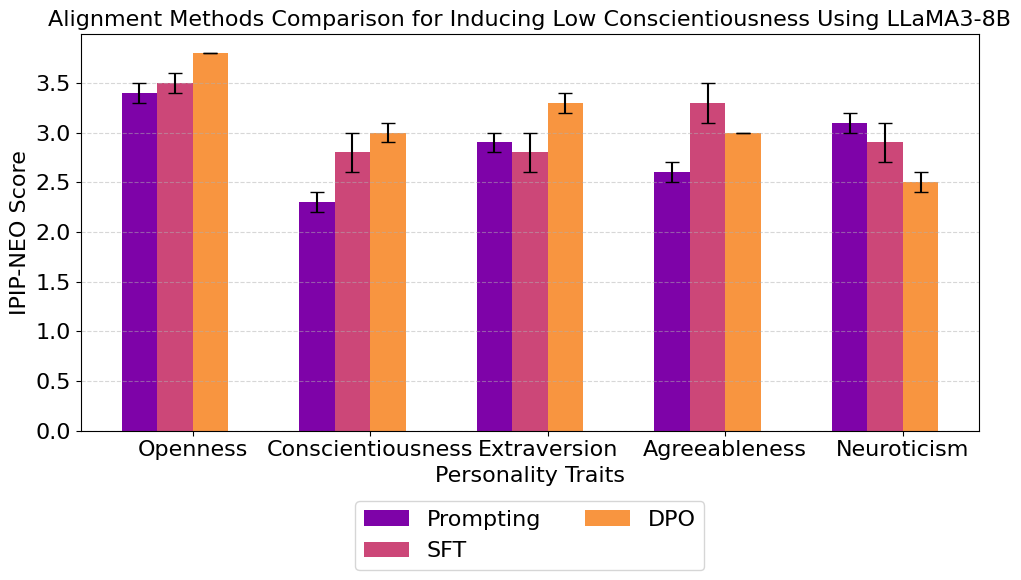

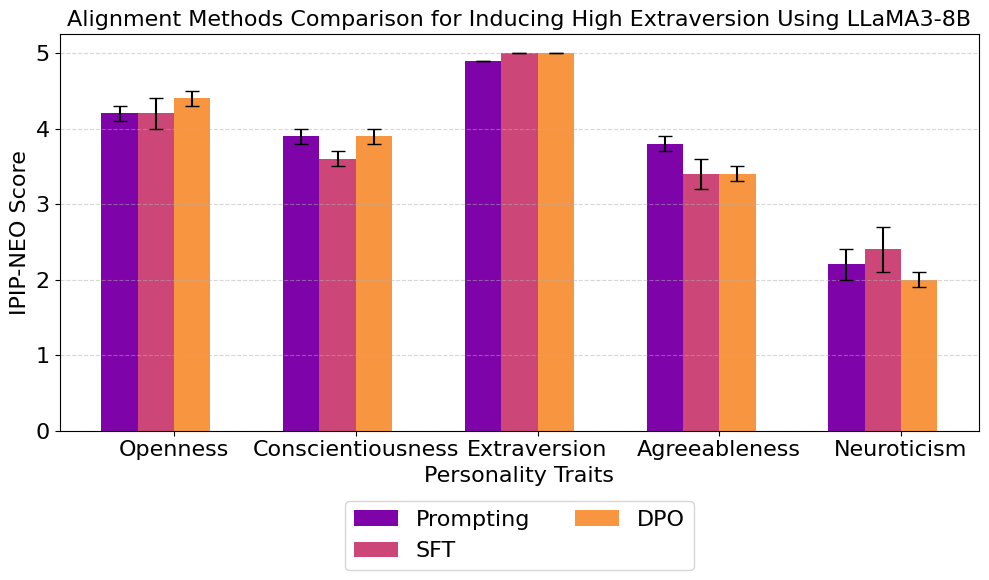

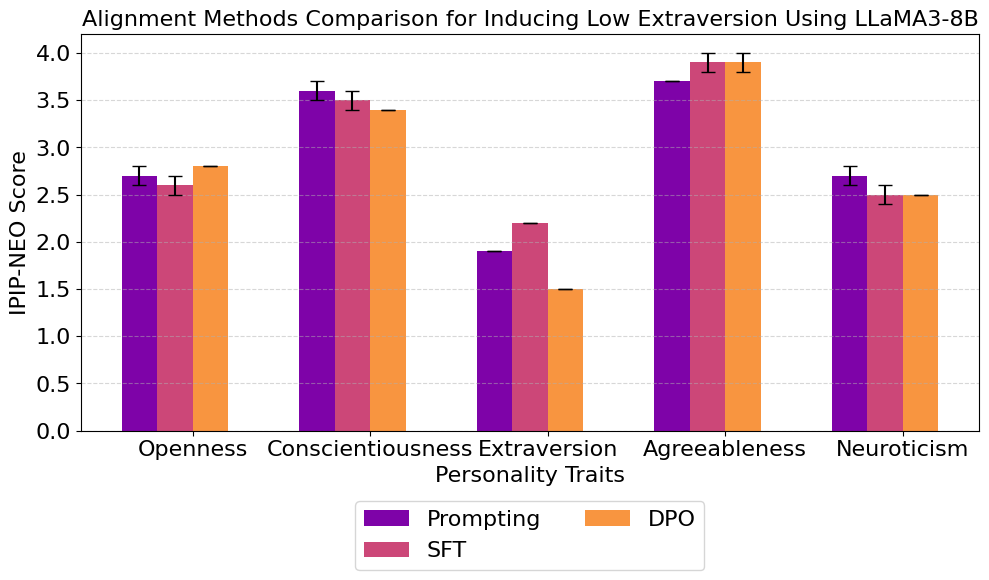

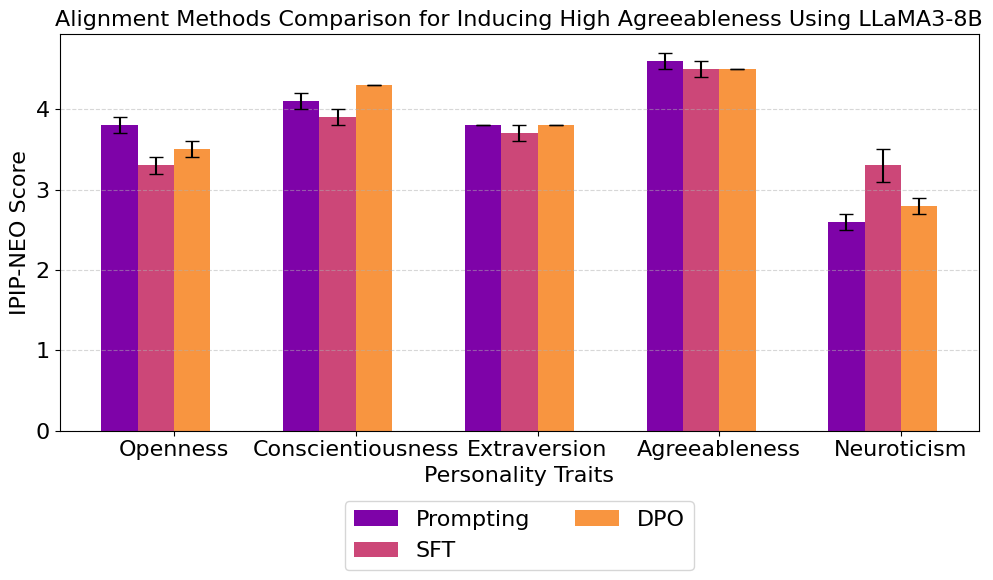

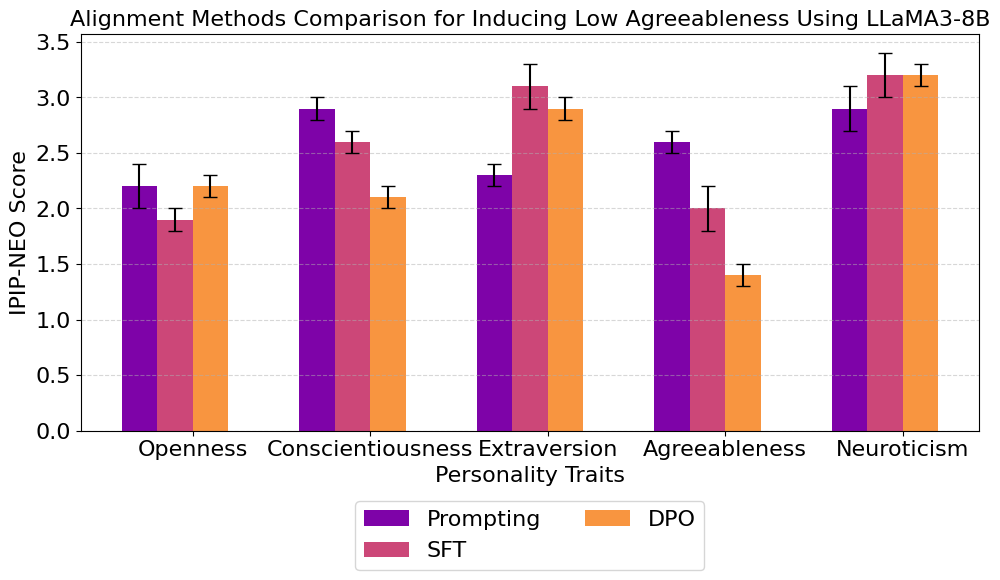

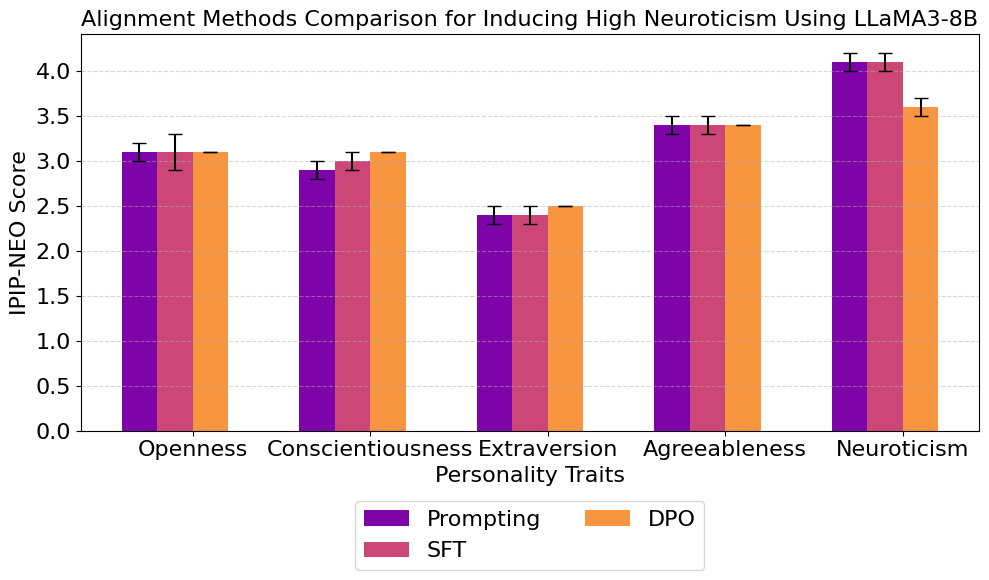

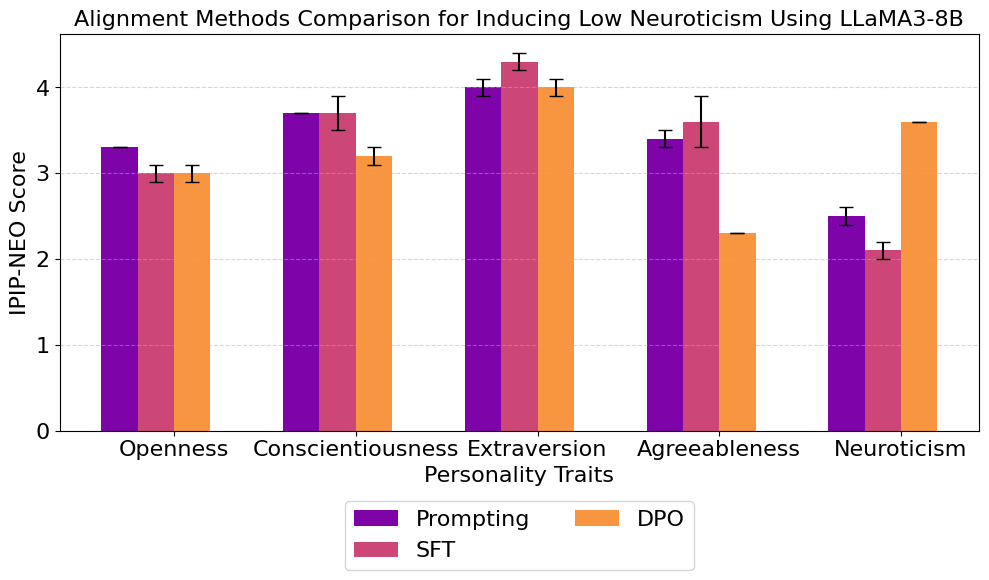

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["BFI", "IPIP-NEO"]
models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

for questionnaire in questionnaires:
    for model, model_abbr in models:
        for mode, description in description_modes:
            # colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
            cmap = plt.cm.plasma
            colors = [cmap(i) for i in np.linspace(0, 1, 5)]
            patterns = ['/', '\\', '|', '-']

            # crowd_labeled = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_mean" for i in labels]].values.tolist()[0]
            prompting_method = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'prompt_v1_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]
            sft_training = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]
            dpo_training = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_dpo_{mode}')) & (df['model'] == model)][[f"{i}_mean" for i in labels]].values.tolist()[0]

            # crowd_labeled_std = df.loc[(df['questionnaire'] == questionnaire) & (df['mode_mode'] == 'crowd')][[f"{i}_std" for i in labels]].values.tolist()[0]
            prompting_method_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'prompt_v1_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]
            sft_training_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]
            dpo_training_std = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'train_dpo_{mode}')) & (df['model'] == model)][[f"{i}_std" for i in labels]].values.tolist()[0]

            # Grouping data for plotting
            data = [prompting_method, sft_training, dpo_training]
            data_std = [prompting_method_std, sft_training_std, dpo_training_std]
            bar_labels = ['Prompting', 'SFT', 'DPO']
            x = np.arange(len(labels))  # X-axis positions
            bar_width = 0.2  # Width of each bar

            # Plotting
            plt.figure(figsize=(10, 6))
            for i, (values, std) in enumerate(zip(data, data_std)):
                plt.bar(x + i * bar_width, values, yerr=std, capsize=5, width=bar_width, label=bar_labels[i], color=colors[(i+1) % len(colors)])

            # Customizing plot
            plt.xlabel('Personality Traits', fontsize=16)
            plt.ylabel(f'{questionnaire} Score', fontsize=16)
            plt.xticks(x + bar_width * 1.5, labels, fontsize=16)  # Center ticks on groups
            plt.yticks(fontsize=16)
            plt.title(f'Alignment Methods Comparison for Inducing {description} Using {model_abbr}', fontsize=16)
            plt.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
            plt.grid(axis='y', linestyle='--', alpha=0.5)

            # Display the plot
            plt.tight_layout()
            # plt.show()
            plt.savefig(f"stats/plots/alignment_v1/{questionnaire}_{model}_{'_'.join(description.lower().split())}.pdf", bbox_inches='tight')